In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("winequality_white.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
X = data[data.columns[:-1]].values
y = data["quality"].values

On a importé nos données. Séparons-les en deux jeux : le jeu d'dentraînement et le jeu de test.

In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7)

Standardisons les données.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

Entraînons un 11-NN sur ces données.

In [22]:
from sklearn.neighbors import KNeighborsRegressor
kNN = KNeighborsRegressor(n_neighbors=11).fit(Xtrain_scaled, ytrain)

Appliquons-le pour prédire les étiquettes de notre jeu de test.

In [23]:
ypred = kNN.predict(Xtest_scaled)

Calculons la Root Mean Squared Error.

In [25]:
from sklearn.metrics import mean_squared_error
print("RMSE = %.02f" % np.sqrt(mean_squared_error(ypred, ytest)))

RMSE = 0.72


Nos étiquettes étant des nombres entiers, nous faisons en moyenne une erreur inférieure à la plus petite différence possible entre deux notes.

Nous pouvons visualiser les résultats à travers un graphique, avec en abscisse les vraies valeurs et en ordonnée les valeurs prédites.

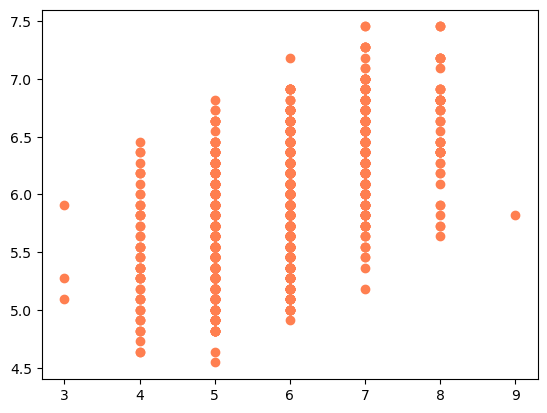

In [30]:
import matplotlib.pyplot as plt
plt.scatter(ytest, ypred, color ='coral')
plt.show()

Hmm... On ne voit pas grand-chose. On va modifier le graphique pour que chaque point soit de taille proportionnelle au nombre d'étiquettes représentées.

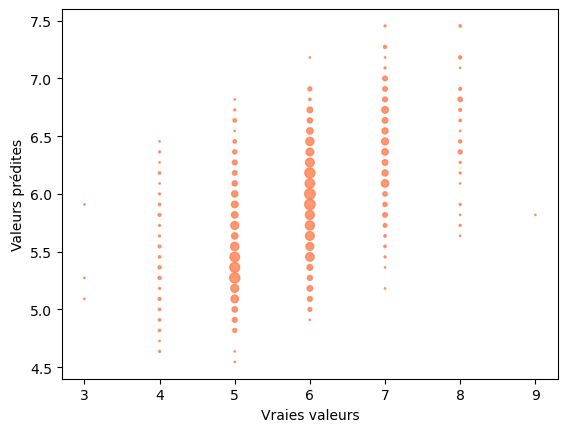

In [33]:
sizes = {}
for (yt, yp) in zip(ytest, ypred):
    if (yt, yp) in sizes:
        sizes[(yt, yp)] += 1
        
    else:
        sizes[(yt, yp)] = 1

keys = sizes.keys()
plt.scatter(
        [k[0] for k in keys], # Vraie valeur
        [k[1] for k in keys], # Valeur prédite
        s = [sizes[k] for k in keys], # Taille du marker
        color = 'coral', # Couleur
        alpha = 0.8) # Transparence

plt.xlabel("Vraies valeurs")
plt.ylabel("Valeurs prédites")
plt.show()

Pour mieux comprendre notre modèle, comparons-le avec une première approche naïve, qui consiste à prédire une valeur aléatoire entre le min et le max des y observés.

In [34]:
y_pred_random = np.random.randint(np.min(ytrain), np.max(ytrain), ytest.shape)

Calculons la RMSE correspondante.

In [35]:
print("RMSE naïve = %.02f" % np.sqrt(mean_squared_error(y_pred_random, ytest)))

RMSE naïve = 1.98


C'est bien supérieur à ce qu'avait obtenu notre 11-NN. Notre modèle était donc mieux que le pure aléatoire. Chouette.

Une autre approche possible, c'est de regarder la moyenne des qualités et de considérer l'algorithme naïf qui renvoie cette moyenne.

In [36]:
data["quality"].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

Il existe en fait une fonction directement implémenter dans scikit-learn qui permet d'implémenter un tel algorithme.

In [38]:
from sklearn.dummy import DummyRegressor
dum = DummyRegressor(strategy = "mean")
dum.fit(Xtrain_scaled, ytrain)

ypred_dummy = dum.predict(Xtest_scaled)

print("RMSE de la mean-strategy = %.02f" % np.sqrt(mean_squared_error(ypred_dummy, ytest)))

RMSE de la mean-strategy = 0.89


0.89 > 0.72, donc le 11-NN est meilleur que la mean strategy. Cependant, il faut quand même concéder que notre modèle n'est pas si fort que ça.